# Chapter 9 - Statistics for Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter
%matplotlib inline

## Logistic Regression

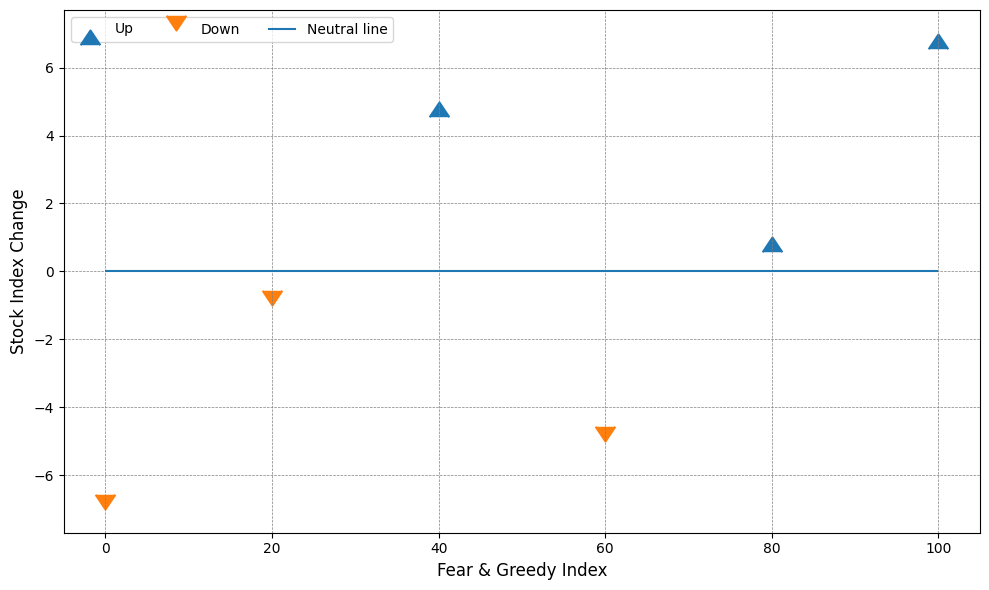

In [4]:
np.random.seed(894288)                                    # Set the random seed for reproducibility

# Generate data for Fear & Greedy (FG) index and Stock Index Change
fg_index = np.linspace(0, 100, 6)                         # Create FG index values evenly spaced between 0 and 100 (6 points)
stock_index_change = (fg_index - 50) * 0.3 - np.sign((fg_index - 50) * 0.3) * 8  
# Calculate stock index change with a linear relationship, applying an offset of ±8 to simulate upward/downward trends

# Initialize the figure
plt.figure(figsize=(10, 6))                               # Set the figure size to 10x6 inches

# Plot points where stock index change is positive (Upward movement)
plt.scatter(fg_index[stock_index_change > 0],             # X-axis: FG index values where stock change > 0
            stock_index_change[stock_index_change > 0],   # Y-axis: Corresponding positive stock index changes
            s=200,                                        # Marker size
            marker=6,                                     # Use marker style 6 (upward triangle)
            label="Up")                                   # Label for the legend

# Plot points where stock index change is negative (Downward movement)
plt.scatter(fg_index[stock_index_change < 0],             # X-axis: FG index values where stock change < 0
            stock_index_change[stock_index_change < 0],   # Y-axis: Corresponding negative stock index changes
            s=200,                                        # Marker size
            marker=7,                                     # Use marker style 7 (downward triangle)
            label="Down")                                 # Label for the legend

# Add a horizontal reference line at 0 to indicate "neutral" stock index change
plt.hlines(0, 0, 100, label="Neutral line")               # Plot horizontal line at y=0 from x=0 to x=100

# Add axis labels with increased font size
plt.xlabel("Fear & Greedy Index", fontsize=12)            # X-axis label: FG Index
plt.ylabel("Stock Index Change", fontsize=12)             # Y-axis label: Stock Index Change

# Add a legend with three columns for better presentation
plt.legend(ncol=3)                                        # Display legend with 3 columns for compact layout

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add a grid

plt.tight_layout()                                        # Adjust layout to avoid overlap
plt.show()                                                # Display the plot

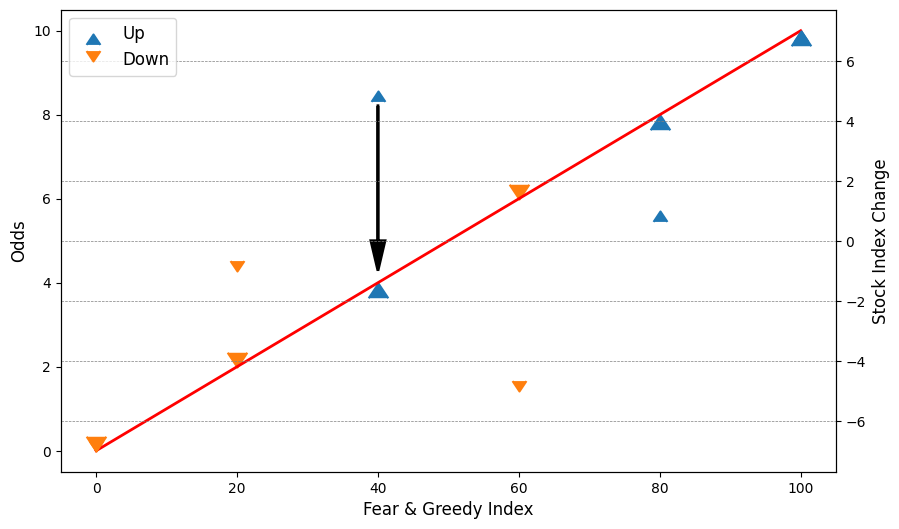

In [5]:
# Define the slope and intercept for the linear line
slope, intercept = 0.1, 0  

# Create a figure and axis for the first plot
fig, ax1 = plt.subplots(figsize=(10, 6))  # Set the figure size to 10x6 inches

# Plot the "Up" points on the primary axis (ax1) for the Odds
ax1.scatter(fg_index[stock_index_change > 0],              # X-axis: FG index where stock change > 0
            (slope * fg_index + intercept)[stock_index_change > 0],  # Y-axis: Linear relationship for odds
            s=200,                                         # Marker size
            marker=6,                                      # Upward triangle marker
            label="Up")                                    # Label for legend

# Plot the "Down" points on the primary axis (ax1) for the Odds
ax1.scatter(fg_index[stock_index_change < 0],              # X-axis: FG index where stock change < 0
            (slope * fg_index + intercept)[stock_index_change < 0],  # Y-axis: Linear relationship for odds
            s=200,                                         # Marker size
            marker=7,                                      # Downward triangle marker
            label="Down")                                  # Label for legend

# Plot the linear trend line (Odds) on the primary axis (ax1)
ax1.plot(fg_index, slope * fg_index + intercept,           # X and Y values for the line
         linewidth=2,                                      # Set line width
         c="red",                                          # Set line color to red
         label="Odds")                                     # Label for the trend line

# Create a secondary Y-axis (ax2) sharing the same X-axis (twinx)
ax2 = ax1.twinx()                                          # Secondary Y-axis for stock index change

# Plot the "Up" points on the secondary axis (ax2) for Stock Index Change
ax2.scatter(fg_index[stock_index_change > 0],              # X-axis: FG index where stock change > 0
            stock_index_change[stock_index_change > 0],    # Y-axis: Actual stock index changes
            s=100,                                         # Marker size (smaller for clarity)
            marker=6,                                      # Upward triangle marker
            label="Up")                                    # Label for legend

# Plot the "Down" points on the secondary axis (ax2) for Stock Index Change
ax2.scatter(fg_index[stock_index_change < 0],              # X-axis: FG index where stock change < 0
            stock_index_change[stock_index_change < 0],    # Y-axis: Actual stock index changes
            s=100,                                         # Marker size (smaller for clarity)
            marker=7,                                      # Downward triangle marker
            label="Down")                                  # Label for legend

# Add an arrow annotation to highlight a specific point
ax2.arrow(fg_index[2], stock_index_change[2] - 0.5,        # Starting point (X, Y) for the arrow
          0, -4.5,                                         # Arrow direction: move downward by 4.5 units
          head_width=2, head_length=1,                     # Arrowhead width and length
          fc='k', ec='k', linewidth=2)                     # Arrow color (black) and line width

# Add labels for the primary and secondary axes
ax1.set_xlabel("Fear & Greedy Index", fontsize=12)         # Label for X-axis
ax1.set_ylabel("Odds", fontsize=12)                        # Label for primary Y-axis (Odds)
ax2.set_ylabel("Stock Index Change", fontsize=12)          # Label for secondary Y-axis (Stock changes)

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Dashed grey gridlines

# Add a legend with an increased font size
plt.legend(fontsize=12)

# Display the final plot
plt.show()

### Change intercept

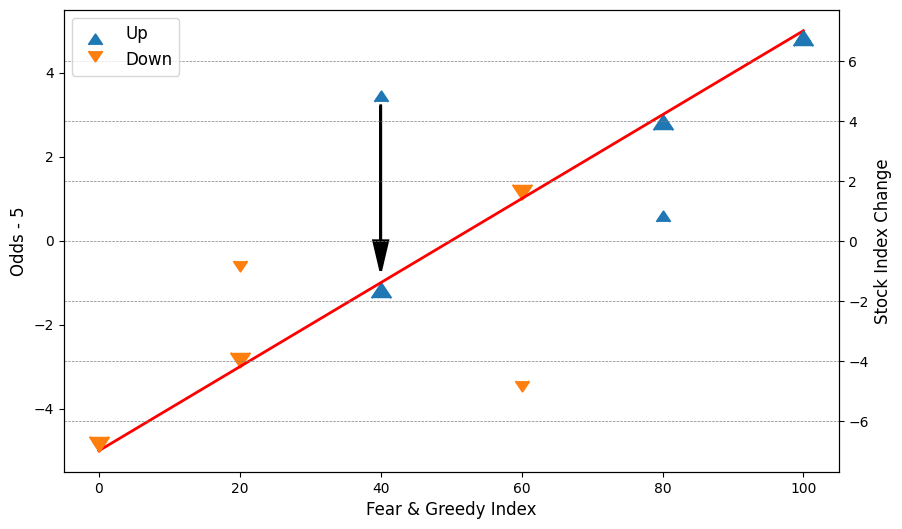

In [7]:
# Define the slope and intercept for the linear line
slope, intercept = 0.1, -5  

# Create a figure and primary axis (ax1)
fig, ax1 = plt.subplots(figsize=(10, 6))  # Set the figure size to 10x6 inches

# Plot the "Up" points on the primary axis (Odds - 5)
ax1.scatter(fg_index[stock_index_change > 0],                # X-axis: FG index where stock change > 0
            (slope * fg_index + intercept)[stock_index_change > 0],  # Y-axis: Adjusted Odds line values
            s=200,                                           # Marker size
            marker=6,                                        # Upward triangle marker
            label="Up")                                      # Label for legend

# Plot the "Down" points on the primary axis (Odds - 5)
ax1.scatter(fg_index[stock_index_change < 0],                # X-axis: FG index where stock change < 0
            (slope * fg_index + intercept)[stock_index_change < 0],  # Y-axis: Adjusted Odds line values
            s=200,                                           # Marker size
            marker=7,                                        # Downward triangle marker
            label="Down")                                    # Label for legend

# Plot the linear trend line on the primary axis (ax1)
ax1.plot(fg_index, slope * fg_index + intercept,             # X and Y values for the line
         linewidth=2,                                        # Set line width
         c="red")                                            # Set line color to red

# Create a secondary Y-axis (ax2) sharing the same X-axis (twinx)
ax2 = ax1.twinx()                                            # Secondary Y-axis for stock index changes

# Plot the "Up" points on the secondary axis (ax2) for Stock Index Change
ax2.scatter(fg_index[stock_index_change > 0],                # X-axis: FG index where stock change > 0
            stock_index_change[stock_index_change > 0],      # Y-axis: Actual stock index changes
            s=100,                                           # Marker size
            marker=6,                                        # Upward triangle marker
            label="Up")                                      # Label for legend

# Plot the "Down" points on the secondary axis (ax2) for Stock Index Change
ax2.scatter(fg_index[stock_index_change < 0],                # X-axis: FG index where stock change < 0
            stock_index_change[stock_index_change < 0],      # Y-axis: Actual stock index changes
            s=100,                                           # Marker size
            marker=7,                                        # Downward triangle marker
            label="Down")                                    # Label for legend

# Add an arrow annotation to emphasize a downward trend
ax2.arrow(fg_index[2], stock_index_change[2] - 0.5,          # Starting point (X, Y) for the arrow
          0, -4.5,                                           # Arrow direction: vertical downward shift
          head_width=2, head_length=1,                       # Arrowhead width and length
          fc='k', ec='k', linewidth=2)                       # Arrow color (black) and line thickness

# Uncomment the following line to add a horizontal critical threshold line for Odds
# ax1.axhline(0, linewidth=2, linestyle=":", label="Critical Odds value")

# Set labels for the primary and secondary axes
ax1.set_xlabel("Fear & Greedy Index", fontsize=12)           # X-axis label
ax1.set_ylabel("Odds - 5", fontsize=12)                      # Primary Y-axis label (Odds shifted by -5)
ax2.set_ylabel("Stock Index Change", fontsize=12)            # Secondary Y-axis label (Stock changes)

plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Dashed grey gridlines

# Add a legend with increased font size
plt.legend(fontsize=12)                                      # Display the legend
plt.show()                                                   # Show the final plot

### Logistic Function

In [9]:
# Compute the logistic function for a given input x
def logistic(x):
  return 1 / (1 + np.exp(-x))

# Calculate the shifted odds based on input value, slope, and intercept
def cal_shifted_odds(val, slope, intercept):
    return val*slope + intercept

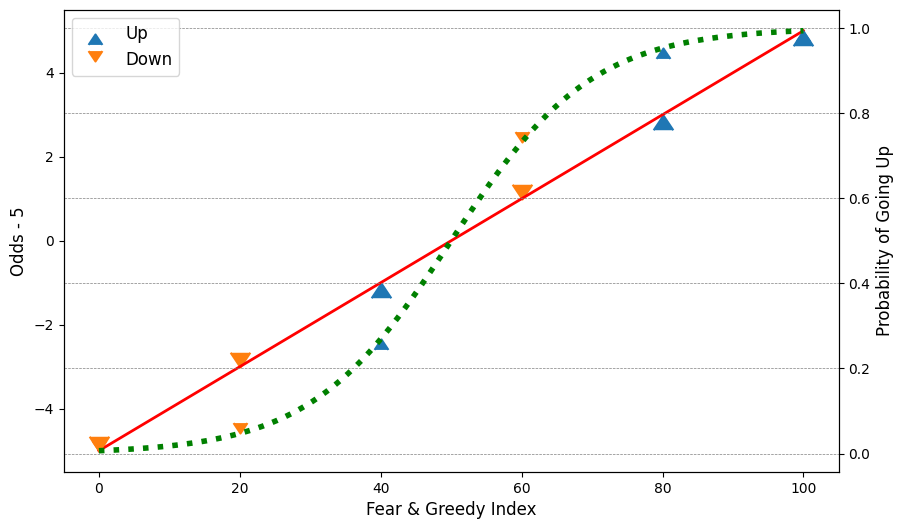

In [10]:
# Set slope and intercept for the linear relationship
slope, intercept = 0.1, -5  

# Initialize the figure and axis for the first plot
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Calculate shifted odds using the cal_shifted_odds function
shifted_odds = cal_shifted_odds(fg_index, slope, intercept)  # Linear transformation of the fg_index

# Plot "Up" points on the first axis where stock_index_change > 0
ax1.scatter(fg_index[stock_index_change > 0],                # X-axis: Fear & Greedy index
            shifted_odds[stock_index_change > 0],            # Y-axis: Shifted odds
            s=200,                                           # Marker size
            marker=6,                                        # Upward-pointing triangle marker
            label="Up")                                      # Legend label

# Plot "Down" points on the first axis where stock_index_change < 0
ax1.scatter(fg_index[stock_index_change < 0],                # X-axis: Fear & Greedy index
            shifted_odds[stock_index_change < 0],            # Y-axis: Shifted odds
            s=200,                                           # Marker size
            marker=7,                                        # Downward-pointing triangle marker
            label="Down")                                    # Legend label

# Plot the linear shifted odds line
ax1.plot(fg_index, shifted_odds,                             # X-axis: Fear & Greedy index, Y-axis: Shifted odds
         linewidth=2,                                        # Line width
         color="red")                                        # Line color

# Create a secondary y-axis for logistic probabilities
ax2 = ax1.twinx()                                            # Twin axis shares the same x-axis as ax1

# Plot "Up" points for logistic probabilities where stock_index_change > 0
ax2.scatter(fg_index[stock_index_change > 0],                # X-axis: Fear & Greedy index
            logistic(shifted_odds)[stock_index_change > 0],  # Y-axis: Logistic-transformed odds
            s=100,                                           # Marker size
            marker=6,                                        # Upward-pointing triangle marker
            label="Up")                                      # Legend label

# Plot "Down" points for logistic probabilities where stock_index_change < 0
ax2.scatter(fg_index[stock_index_change < 0],                # X-axis: Fear & Greedy index
            logistic(shifted_odds)[stock_index_change < 0],  # Y-axis: Logistic-transformed odds
            s=100,                                           # Marker size
            marker=7,                                        # Downward-pointing triangle marker
            label="Down")                                    # Legend label

# Generate a smooth grid of Fear & Greedy index values for the logistic curve
fg_grids = np.linspace(0, 100, 100)                          # Create 100 points between 0 and 100

# Plot the logistic curve on the secondary axis
ax2.plot(fg_grids, 
         logistic(cal_shifted_odds(fg_grids, slope, intercept)),  # Logistic-transformed values
         linewidth=4,                                        # Line width
         linestyle=":",                                      # Dotted line style
         color="green")                                      # Line color

ax1.set_xlabel("Fear & Greedy Index", fontsize=12)           # X-axis label for the shared axis
ax1.set_ylabel("Odds - 5", fontsize=12)                      # Y-axis label for the first axis
ax2.set_ylabel("Probability of Going Up", fontsize=12)       # Y-axis label for the second axis

plt.legend(fontsize=12)                                              # Add legend with specified font size
plt.grid(visible=True, linestyle="--", color="grey", linewidth=0.5)  # Add a dashed grey grid

# Display the plot
plt.show()

### Test positiveness

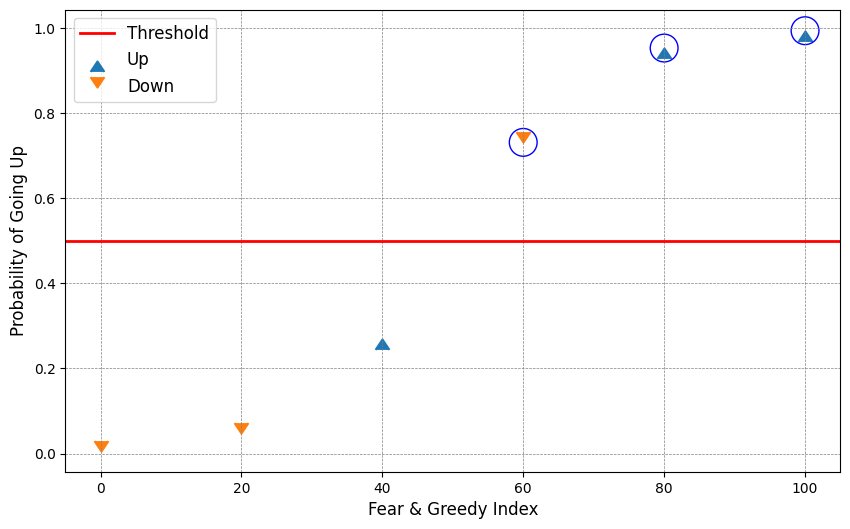

In [12]:
# Set the slope, intercept, and threshold for the logistic model
slope, intercept, threshold = 0.1, -5, 0.5  

# Initialize a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Calculate shifted odds using the provided function
shifted_odds = cal_shifted_odds(fg_index, slope, intercept)  # Linear transformation of the fg_index

# Plot a horizontal line for the threshold probability
ax1.axhline(threshold,          # Y-position for the threshold
            linewidth=2,        # Line width
            color="red",        # Line color
            label="Threshold")  # Add a label for the legend

# Plot "Up" points (positive stock index change) on the logistic curve
ax1.scatter(fg_index[stock_index_change > 0],  # X-axis: Fear & Greedy Index
            logistic(shifted_odds)[stock_index_change > 0],  # Y-axis: Logistic probabilities
            s=100,              # Marker size
            marker=6,           # Upward-pointing triangle marker
            label="Up")         # Legend label

# Plot "Down" points (negative stock index change) on the logistic curve
ax1.scatter(fg_index[stock_index_change < 0],  # X-axis: Fear & Greedy Index
            logistic(shifted_odds)[stock_index_change < 0],  # Y-axis: Logistic probabilities
            s=100,              # Marker size
            marker=7,           # Downward-pointing triangle marker
            label="Down")       # Legend label

# Highlight points where the logistic probability exceeds the threshold
ax1.scatter(fg_index[logistic(cal_shifted_odds(fg_index, slope, intercept)) > threshold],  # X-values exceeding threshold
            logistic(cal_shifted_odds(fg_index, slope, intercept))[logistic(cal_shifted_odds(fg_index, slope, intercept)) > threshold],  
            s=400,              # Larger marker size for emphasis
            facecolors='none',  # Transparent marker face
            edgecolors='blue')  # Blue edges for the markers

# Add x-axis and y-axis labels with increased font size
ax1.set_xlabel("Fear & Greedy Index", fontsize=12)      # X-axis label
ax1.set_ylabel("Probability of Going Up", fontsize=12)  # Y-axis label

# Add legend with larger font size for better readability
ax1.legend(fontsize=12)

# Add gridlines to the plot for better visualization
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Dashed grey gridlines

# Display the plot
plt.show()

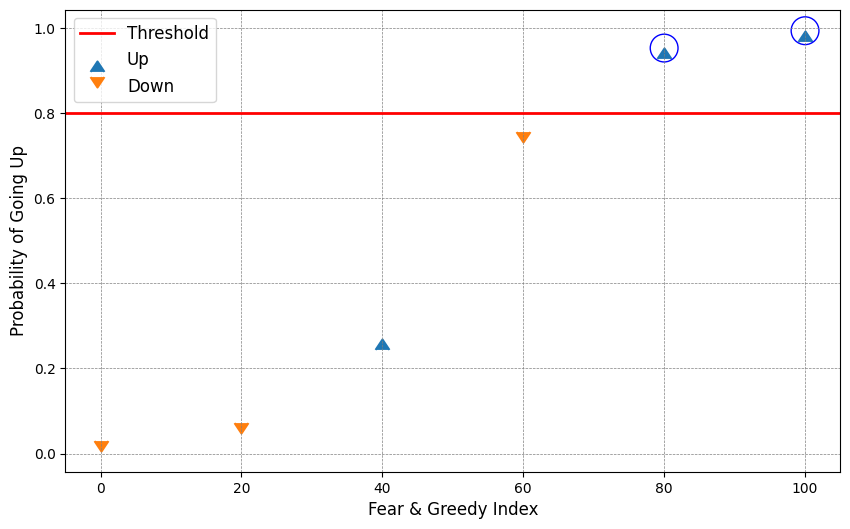

In [13]:
# Set the slope, intercept, and threshold for the logistic model
slope, intercept, threshold = 0.1, -5, 0.8  

# Initialize a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))  # Set the figure size to 10x6 inches

# Calculate shifted odds using the provided function
shifted_odds = cal_shifted_odds(fg_index, slope, intercept)  # Linear transformation of the fg_index

# Plot a horizontal line representing the threshold probability
ax1.axhline(threshold,          # Y-position for the threshold
            linewidth=2,        # Line width
            color="red",        # Line color
            label="Threshold")  # Add label for the legend

# Plot "Up" points (positive stock index change) on the logistic curve
ax1.scatter(fg_index[stock_index_change > 0],  # X-axis: Fear & Greedy Index
            logistic(shifted_odds)[stock_index_change > 0],  # Y-axis: Logistic probabilities
            s=100,       # Marker size
            marker=6,    # Upward-pointing triangle marker
            label="Up")  # Legend label

# Plot "Down" points (negative stock index change) on the logistic curve
ax1.scatter(fg_index[stock_index_change < 0],  # X-axis: Fear & Greedy Index
            logistic(shifted_odds)[stock_index_change < 0],  # Y-axis: Logistic probabilities
            s=100,         # Marker size
            marker=7,      # Downward-pointing triangle marker
            label="Down")  # Legend label

# Highlight points where the logistic probability exceeds the threshold
ax1.scatter(fg_index[logistic(cal_shifted_odds(fg_index, slope, intercept)) > threshold],  # X-values exceeding threshold
            logistic(cal_shifted_odds(fg_index, slope, intercept))[logistic(cal_shifted_odds(fg_index, slope, intercept)) > threshold],  
            s=400,              # Larger marker size for emphasis
            facecolors='none',  # Transparent marker face
            edgecolors='blue')  # Blue edges for the markers


ax1.set_xlabel("Fear & Greedy Index", fontsize=12)      # X-axis label
ax1.set_ylabel("Probability of Going Up", fontsize=12)  # Y-axis label

ax1.legend(fontsize=12) # Add legend 


plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Dashed grey gridlines

# Display the plot
plt.show()

### Maximize Likelihood

In [15]:
probs = logistic(cal_shifted_odds(fg_index,slope,intercept))  # Calculate probabilities using the logistic function on shifted odds
probs                                                         # Display the calculated probabilities

array([0.00669285, 0.04742587, 0.26894142, 0.73105858, 0.95257413,
       0.99330715])

Calculate the product of probabilities for positive stock index changes and the product of complementary probabilities (1 - probs) for negative stock index changes, then multiply the two results to get the combined likelihood.

In [17]:
np.prod(probs[stock_index_change > 0]) * np.prod(1 - probs[stock_index_change < 0])  

0.06475600928864741

### Another set of parameters

In [19]:
probs = logistic(cal_shifted_odds(fg_index,         # Calculate probabilities using logistic function  
                                  slope=0.11,       # Set the slope for the odds function  
                                  intercept=-5.5))  # Set the intercept for the odds function  

# Compute likelihood for positive changes and multiply by the likelihood for negative changes 
np.prod(probs[stock_index_change > 0]) * np.prod(1 - probs[stock_index_change < 0])  

0.057540510171776825

Our original choice set of parameters is actually better.

To find the parameters that maximize the likelihood function exactly, let's use thesklearn library. The following code snippet fits a regressor on our data points:

In [21]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(penalty=None,               # Initialize logistic regression without penalty
                                solver="newton-cg").fit(   # Use Newton-CG solver for optimization
    fg_index.reshape(-1, 1),                               # Reshape fg_index for fitting the model
    stock_index_change > 0)                                # Target: whether stock index change is positive

print("    slope:  ", regressor.coef_[0][0])               # Print the slope (coefficient)
print("intercept: ", regressor.intercept_[0])              # Print the intercept

    slope:   0.06069622685844547
intercept:  -3.034761435471657


In [22]:
probs = logistic(cal_shifted_odds(fg_index,                # Calculate logistic probabilities based on shifted odds
                                  slope=0.06070138,        # Slope parameter for the odds
                                  intercept=-3.03506894))  # Intercept parameter for the odds

# Compute product of probabilities where stock index change is positive * Compute product of (1 - probabilities) where stock index change is negative
np.prod(probs[stock_index_change > 0]) * np.prod(1 - probs[stock_index_change < 0])   

0.08391198433138393

# Naïve Bayesian Classification from Scratch

#### Sample Data

In [25]:
url1 = ('https://raw.githubusercontent.com/PacktPublishing/Essential-Statistics-for-Non-STEM-Data-Analysts/refs/heads/master/Chapter09/strok_risk.csv')

stroke_risk = pd.read_csv(url1)

stroke_risk

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,middle
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


| | stroke_risk = high | stroke_risk = middle | stroke_risk = low |
|----------|----------|----------|----------|
| **weight = high** | 3/4   | 0   | 0   |
| **weight = middle** | 1/4   | 2/3   | 4/8   |
| **weight = low** | 0   | 1/3   | 4/8   |

| | stroke_risk = high | stroke_risk = middle | stroke_risk = low |
|----------|----------|----------|----------|
| **high_oil_diet = yes** | 2/4   | 2/3   | 2/8   |
| **high_oil_diet = no** | 2/4   | 1/3   | 2/6   |

| | stroke_risk = high | stroke_risk = middle | stroke_risk = low |
|----------|----------|----------|----------|
| **smoking = yes** | 4/4   | 1/3   | 2/8   |
| **smoking = no** | 0/4   | 2/3   | 6/8   |

In [27]:
# Define a function to compute prior and conditional probabilities for Naive Bayes
def build_probabilities(df, feature_columns: list, category_variable: str):  
    
    # Build prior probabilities
    prior_probability = Counter(df[category_variable])                          # Count occurrences of each category in the target variable
    
    conditional_probabilities = {}                                              # Initialize a dictionary for conditional probabilities
    
    for key in prior_probability:                                               # Loop through each category in the target variable
        
        conditional_probabilities[key] = {}                                     # Initialize nested dictionary for the category
        
        for feature in feature_columns:                                         # Loop through each feature column to calculate probabilities
            
            feature_kinds = set(np.unique(df[feature]))                         # Identify unique levels in the feature
            
            feature_dict = Counter(df[df[category_variable] == key][feature])   # Count occurrences of feature levels for the current category
           
            for possible_feature in feature_kinds:  
                
                if possible_feature not in feature_dict:             # Add missing feature levels with zero count
                    feature_dict[possible_feature] = 0

            total = sum(feature_dict.values())                       # Calculate the total count for normalization
            
            for feature_level in feature_dict:       
                feature_dict[feature_level] /= total                 # Normalize counts to probabilities

            conditional_probabilities[key][feature] = feature_dict   # Store conditional probabilities for the category and feature
            
    return prior_probability, conditional_probabilities              # Return the prior and conditional probabilities as dictionaries

In [28]:
# Call the function to compute prior and conditional probabilities for stroke risk analysis.

prior_prob, conditional_prob = build_probabilities(
    stroke_risk,                                             # DataFrame containing stroke risk data.
    feature_columns=["weight", "high_oil_diet", "smoking"],  # Features to calculate conditional probabilities.
    category_variable="stroke_risk"                          # Target variable for categorization.
)

In [29]:
from pprint import pprint

# Display the formatted conditional probabilities dictionary
pprint(conditional_prob)

{'high': {'high_oil_diet': Counter({'yes': 0.5, 'no': 0.5}),
          'smoking': Counter({'yes': 1.0, 'no': 0.0}),
          'weight': Counter({'high': 0.75, 'middle': 0.25, 'low': 0.0})},
 'low': {'high_oil_diet': Counter({'no': 0.75, 'yes': 0.25}),
         'smoking': Counter({'no': 0.75, 'yes': 0.25}),
         'weight': Counter({'low': 0.5, 'middle': 0.5, 'high': 0.0})},
 'middle': {'high_oil_diet': Counter({'yes': 0.6666666666666666,
                                      'no': 0.3333333333333333}),
            'smoking': Counter({'no': 0.6666666666666666,
                                'yes': 0.3333333333333333}),
            'weight': Counter({'middle': 0.6666666666666666,
                               'low': 0.3333333333333333,
                               'high': 0.0})}}


In [30]:
from collections import Counter

def format_probabilities(prob_dict, decimals=2):
   
    def format_nested(d):
        # Recursively process nested dictionaries
        if isinstance(d, dict):
            return {k: format_nested(v) for k, v in d.items()}
        elif isinstance(d, Counter) or isinstance(d, dict):
            return {k: round(v, decimals) for k, v in d.items()}
        else:
            return round(d, decimals)

    return format_nested(prob_dict)

# Format the dictionary
formatted_dict = format_probabilities(conditional_prob, decimals=2)

# Print the formatted dictionary
pprint(formatted_dict)

{'high': {'high_oil_diet': {'no': 0.5, 'yes': 0.5},
          'smoking': {'no': 0.0, 'yes': 1.0},
          'weight': {'high': 0.75, 'low': 0.0, 'middle': 0.25}},
 'low': {'high_oil_diet': {'no': 0.75, 'yes': 0.25},
         'smoking': {'no': 0.75, 'yes': 0.25},
         'weight': {'high': 0.0, 'low': 0.5, 'middle': 0.5}},
 'middle': {'high_oil_diet': {'no': 0.33, 'yes': 0.67},
            'smoking': {'no': 0.67, 'yes': 0.33},
            'weight': {'high': 0.0, 'low': 0.33, 'middle': 0.67}}}


#### Example:

    P(weight = high|stroke_risk = high) = 0.75

### Prediction Function

In [33]:
def predict(prior_prob, conditional_prob, feature_values: dict):       # Define the predict function
    
    probs = {}                                                         # Initialize an empty dictionary for probabilities
    total = sum(prior_prob.values())                                   # Calculate the total prior probability
    for key in prior_prob:                                             # Iterate over each category in prior probabilities
        probs[key] = prior_prob[key] / total                           # Normalize the prior probabilities

    for key in probs:                                                  # Iterate over each category in normalized probabilities
        posterior_dict = conditional_prob[key]                         # Get the conditional probabilities for the category
        for feature_name, feature_level in feature_values.items():     # Iterate over input feature values
            probs[key] *= posterior_dict[feature_name][feature_level]  # Update the posterior probability for the category

    total = sum(probs.values())                                        # Calculate the total posterior probability
    if total == 0:                                                     # Check if the total posterior is zero
        print("Undetermined!")                                         # Print a warning if probabilities are undefined
    else:                                                              # Otherwise, normalize the posterior probabilities
        for key in probs:                                              # Iterate over each category in posterior probabilities
            probs[key] /= total                                        # Normalize by dividing by the total posterior
            
        return probs                                                   # Return the final normalized probabilities

In [34]:
# Posterior probabilities of the target variable (stroke_risk) for each category (low, high, middle) given the input features:
predict(prior_prob,conditional_prob,{"weight":"middle",      # weight = middle
                                     "high_oil_diet":"no",   # high_oil_diet = no
                                     "smoking":"yes"})       # smoking = yes

{'low': 0.5094339622641509,
 'high': 0.33962264150943394,
 'middle': 0.15094339622641506}

#### Interpretation:

    low: 0.5094:    There is a 50.94% probability that the individual's stroke risk is "low" given the input features.
    high: 0.3396:   There is a 33.96% probability that the individual's stroke risk is "high" given the input features.
    middle: 0.1509: There is a 15.09% probability that the individual's stroke risk is "middle" given the input features.

### Overfitting and Underfitting Examples

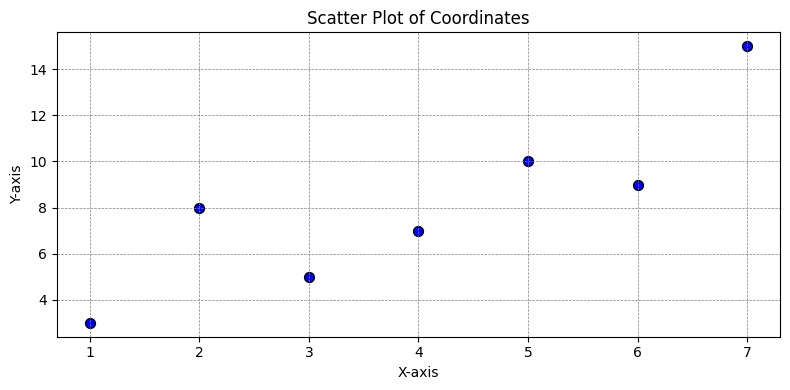

In [37]:
plt.figure(figsize=(8, 4))               # Set the figure size
x_coor = [1, 2, 3, 4, 5, 6, 7]           # Define x-coordinates for the scatter plot
y_coor = [3, 8, 5, 7, 10, 9, 15]         # Define y-coordinates for the scatter plot
plt.scatter(x_coor, y_coor, c='blue',    # Create scatter plot with blue points
            edgecolor='black', s=50)     # Add black edges and set marker size
plt.title("Scatter Plot of Coordinates") # Add a title to the plot
plt.xlabel("X-axis")                     # Label the x-axis
plt.ylabel("Y-axis")                     # Label the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines
plt.tight_layout()                       # Adjust layout for better spacing
plt.show()                               # Display the plot

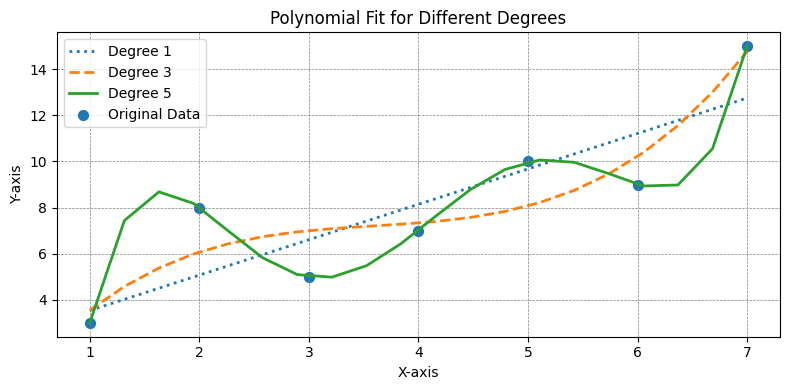

In [38]:
styles = [":", "--", "-"]                      # Define line styles for different polynomial degrees
plt.figure(figsize=(8, 4))                     # Set the figure size
x = np.linspace(1, 7, 20)                      # Generate 20 evenly spaced x-values between 1 and 7

for idx, degree in enumerate(range(1, 6, 2)):  # Loop over polynomial degrees (1, 3, 5)
    coef = np.polyfit(x_coor, y_coor, degree)  # Fit a polynomial of the current degree
    y = np.polyval(coef, x)                    # Evaluate the polynomial at x values
    plt.plot(x, y,                             # Plot the polynomial curve
             linewidth=2,                      # Set line width
             linestyle=styles[idx],            # Use corresponding line style
             label=f"Degree {degree}")         # Add legend entry for the current degree

plt.scatter(x_coor, y_coor,                    # Plot original data points
            s=50,                              # Set marker size
            label="Original Data",             # Add legend entry for original data
            marker="o")                        # Use circle markers
plt.legend(fontsize=10)                        # Add legend with font size 12
plt.xlabel("X-axis")                           # Label the x-axis
plt.ylabel("Y-axis")                           # Label the y-axis
plt.title("Polynomial Fit for Different Degrees")  # Add a title for the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines
plt.tight_layout()                             # Adjust layout to avoid overlaps
plt.show()                                     # Display the plot

### Beyond the original data

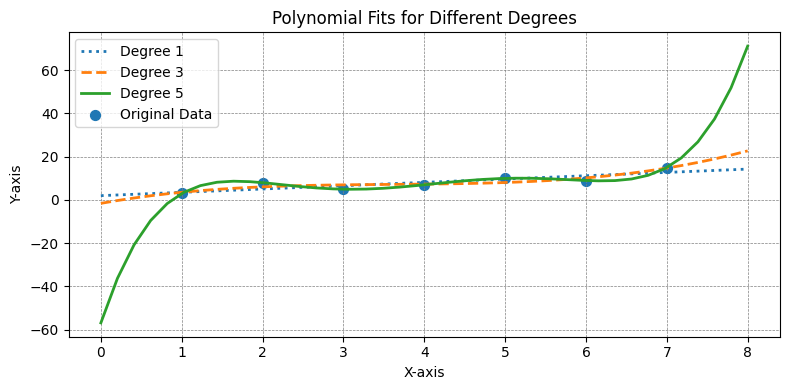

In [40]:
styles = [":", "--", "-"]                      # Define line styles for different polynomial degrees
plt.figure(figsize=(8, 4))                     # Set the figure size
x = np.linspace(0, 8, 40)                      # Generate 40 evenly spaced x-values between 0 and 8

for idx, degree in enumerate(range(1, 6, 2)):  # Loop over polynomial degrees (1, 3, 5)
    coef = np.polyfit(x_coor, y_coor, degree)  # Fit a polynomial of the current degree
    y = np.polyval(coef, x)                    # Evaluate the polynomial at x values
    plt.plot(x, y,                             # Plot the polynomial curve
             linewidth=2,                      # Set line width
             linestyle=styles[idx],            # Use corresponding line style
             label=f"Degree {degree}")         # Add legend entry for the current degree

plt.scatter(x_coor, y_coor,                    # Plot original data points
            s=50,                              # Set marker size
            label="Original Data",             # Add legend entry for original data
            marker="o")                        # Use circle markers

plt.legend(fontsize=10)                        # Add legend with font size
plt.xlabel("X-axis")                           # Label the x-axis
plt.ylabel("Y-axis")                           # Label the y-axis
plt.title("Polynomial Fits for Different Degrees")  # Add a title for the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines
plt.tight_layout()                             # Adjust layout to avoid overlaps
plt.show()                                     # Display the plot

### Cross-Validation

In [42]:
url1 = ('https://raw.githubusercontent.com/PacktPublishing/Essential-Statistics-for-Non-STEM-Data-Analysts/refs/heads/master/Chapter09/strok_risk.csv')

stroke_risk = pd.read_csv(url1)

stroke_risk

,weight,high_oil_diet,smoking,stroke_risk
0,low,yes,no,low
1,low,no,yes,low
2,high,yes,yes,high
3,middle,no,no,low
4,high,yes,yes,high
5,high,no,yes,high
6,low,yes,no,middle
7,low,no,yes,low
8,low,no,no,low
9,middle,no,yes,high


In [43]:
# Define a function to map categorical feature values to numerical values
def map_feature(feature_value, feature):                         
    if feature == "weight" or feature == "stroke_risk":          # Check if the feature is "weight" or "stroke_risk"
        if feature_value == "low":                               # Map "low" to 0
            return 0
        elif feature_value == "middle":                          # Map "middle" to 1
            return 1
        else:                                                    # Map other values (e.g., "high") to 2
            return 2
    elif feature == "high_oil_diet" or feature == "smoking":     # Check if the feature is "high_oil_diet" or "smoking"
        if feature_value == "yes":                               # Map "yes" to 1
            return 1
        else:                                                    # Map "no" to 0
            return 0
    else:                                                        # Handle unknown features
        print("No such feature: {}".format(feature))             # Print an error message for invalid feature names

In [44]:
# Map "weight" values to numerical values using the `map_feature` function
stroke_risk.weight = stroke_risk.weight.map(lambda x: map_feature(x, "weight"))

# Map "high_oil_diet" values to numerical values
stroke_risk.high_oil_diet = stroke_risk.high_oil_diet.map(lambda x: map_feature(x, "high_oil_diet"))  

# Map "smoking" values to numerical values
stroke_risk.smoking = stroke_risk.smoking.map(lambda x: map_feature(x, "smoking"))   

# Map "stroke_risk" values to numerical values
stroke_risk.stroke_risk = stroke_risk.stroke_risk.map(lambda x: map_feature(x, "stroke_risk"))  

# Display the transformed DataFrame
stroke_risk  

,weight,high_oil_diet,smoking,stroke_risk
0,0,1,0,0
1,0,0,1,0
2,2,1,1,2
3,1,0,0,0
4,2,1,1,2
5,2,0,1,2
6,0,1,0,1
7,0,0,1,0
8,0,0,0,0
9,1,0,1,2


In [45]:
from sklearn.linear_model import LogisticRegressionCV

X = stroke_risk[["weight", "high_oil_diet", "smoking"]]  # Select feature columns for the model
y = stroke_risk["stroke_risk"]                           # Select target column for the model

classifier = LogisticRegressionCV(                       # Initialize logistic regression classifier with cross-validation
    cv=3,                                                # Use 3-fold cross-validation
    random_state=2020                                    # Set random state for reproducibility
).fit(X, y)                                              # Fit the classifier to the data

classifier.get_params                                    # Retrieve parameters of the fitted classifier

<bound method BaseEstimator.get_params of LogisticRegressionCV(cv=3, random_state=2020)>

#### Examine the shape of the input data

In [47]:
# Extract the first row of the feature matrix `X` as a NumPy array
X.values[:1, :]  

array([[0, 1, 0]], dtype=int64)

### Predict the probability

Now, let's call the predict_prob() function to predict the probabilities. Let's say
the person is slightly overweight, so they have a weight value of 1.5. Recall that 1 means
middle and 2 means high for weight. This person also eats slightly more fatty foods but
smokes a lot. So, they have 0.5 and 2 on another two features, respectively. The code
reads as follows:

In [50]:
# Input feature vector [1.5, 0.5, 2]
input_features = pd.DataFrame([[1.5, 0.5, 2]], columns=["weight", "high_oil_diet", "smoking"])

input_features

,weight,high_oil_diet,smoking
0,1.5,0.5,2


#### Input Features:

    weight = 1.5: Represents a feature value that lies between "middle" (1) and "high" (2).
    high_oil_diet = 0.5: Represents a feature value that is between "no" (0) and "yes" (1).
    smoking = 2: Represents a feature value that corresponds to "high" or a maximum scaled value in this context.

In [52]:
# Predict the class probabilities
classifier.predict_proba(input_features)  

array([[0.20459894, 0.15384022, 0.64156084]])

    0.20459894: The probability that the input features correspond to the low class.
    0.15384022: The probability that the input features correspond to the middle class.
    0.64156084: The probability that the input features correspond to the high class.

So, this person likely falls into the high stroke risk group.